In [1]:
print('Muhammed on da code')

Muhammed on da code


### 1. Create Tools


In [2]:
from langchain.tools import tool
from typing import Annotated
from typing_extensions import TypedDict

In [10]:
@tool()
def search_tool(query:str) -> str:
  """
    Search Tool
    
    Args:
      query: search term
  """
  return f"Results of Query: {query}"

### 2. Define State Schema


In [ ]:
class GraphState(TypedDict):
  graph_info:str
  

### 3. Create Nodes


In [ ]:
import random
from typing import Literal

In [20]:
def start_play_node(state:GraphState) -> GraphState:
  print('Start Play node has been called')
  state['graph_info'] = state['graph_info'] + ' I am planning to start play'
  return state
  
def critic_node(state: GraphState) -> GraphState:
  print('critic node has been called')
  state['graph_info'] = state['graph_info'] + 'Critic'
  return state

def badminton_node(state: GraphState) -> GraphState:
  print('badminton bode has been called')
  state['graph_info'] = state['graph_info'] + 'badminton node'
  return state

def router(state: GraphState)->Literal['critic','badminton']:
  """Decide next step"""
  next_step = "critic" if random.random() > .5 else 'badminton'
  return next_step

### 4. Build and Connect Graph


In [ ]:
from langgraph.graph import END,START, StateGraph

In [22]:
# Create graph
workflow = StateGraph(GraphState)

# Add Nodes
workflow.add_node("start",start_play_node)
workflow.add_node("critic", critic_node)
workflow.add_node("badminton", badminton_node)


# Set entry point
# workflow.set_entry_point('start')

# Add Conditional edges
workflow.add_conditional_edges(
  'start',
  router
)

# Add Regular edges
workflow.add_edge(START, "start")
workflow.add_edge('critic',END)
workflow.add_edge('badminton',END)

# Compile graph
app = workflow.compile()

### 5. Visualize Graph


In [21]:
from IPython.display import Image, display

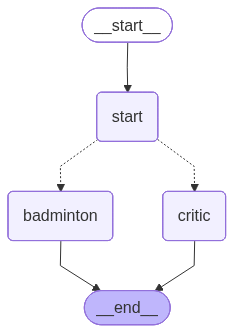

In [23]:
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except:
  raise

### 6. Execute Graph


In [25]:
result = app.invoke({
  'graph_info':""
})

print(result)

Start Play node has been called
critic node has been called
{'graph_info': ' I am planning to start playCritic'}
